In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from empiricaldist import Cdf
from empiricaldist import Pmf
x = np.linspace(0,5)
lams = range(1,6)
fig,ax = plt.subplots(figsize = (15,5))
for lam in lams:
    cdf = 1 - np.exp(-lam*x)
    ax.plot(x,cdf,label = 'lambda :' + str(lam))
    
ax.set_xlabel('X')
ax.set_ylabel('CDF')
ax.set_title('Exponention Distributiuon')
plt.legend()
plt.show()

<Figure size 1500x500 with 1 Axes>

In [4]:
babyboom = pd.read_fwf("babyboom.dat", 
                         names=["time", "babysex", "birthwgt_gm", "minutes_after_midnight"],
                         colspecs=[(1, 8), (9, 16), (17, 24), (25, 32)], skiprows = 59)

In [5]:
babyboom['diff_time'] = babyboom['minutes_after_midnight'].diff().fillna(0)
babyboom_cdf = Cdf.from_seq(babyboom['diff_time'])

Text(0.5, 1.0, 'Time Between Births')

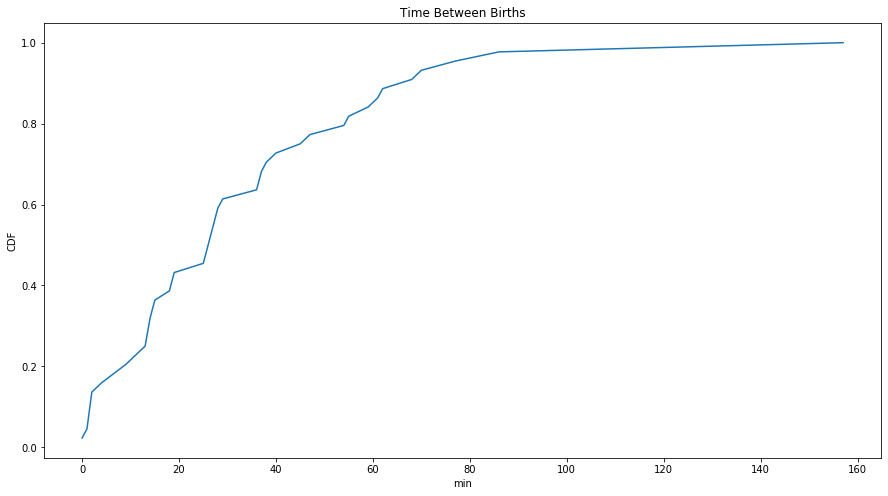

In [6]:

plt.figure(figsize =(15,8))
babyboom_cdf.plot()
plt.xlabel('min')
plt.ylabel('CDF')
plt.title('Time Between Births')

In [7]:
CCDF = pd.DataFrame(1- babyboom_cdf)

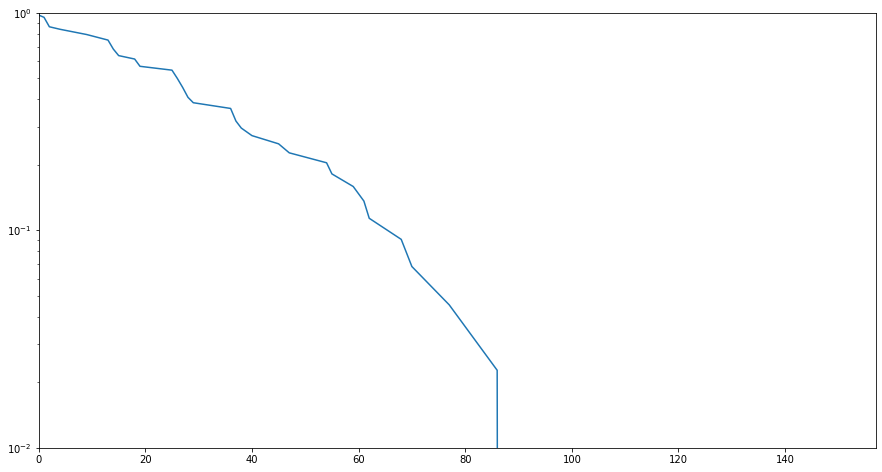

In [8]:
CCDF.plot(legend = False,logy = True,figsize = (15,8),ylim = (0.01,1))

# Exercise 4.2

In [9]:
from random import randint
import datetime
startdate=datetime.date(1985,1,1)
birthdates = []
for i in range(61):
    birthdates.append(startdate+datetime.timedelta(randint(1,365*2)))

In [10]:
birthdates = pd.DataFrame({'BirthDate' : birthdates},dtype = 'datetime64[ns]')
birthdates.sort_values('BirthDate',inplace = True)

In [11]:
birthdates['diff']= birthdates['BirthDate'].diff().dt.days

In [12]:
birthdates.fillna(0,inplace = True)

In [13]:
birthdates_cdf = Cdf.from_seq(birthdates['diff'])

In [14]:
CCDF_birhday = pd.DataFrame(1- birthdates_cdf)

Text(0, 0.5, 'CCDF')

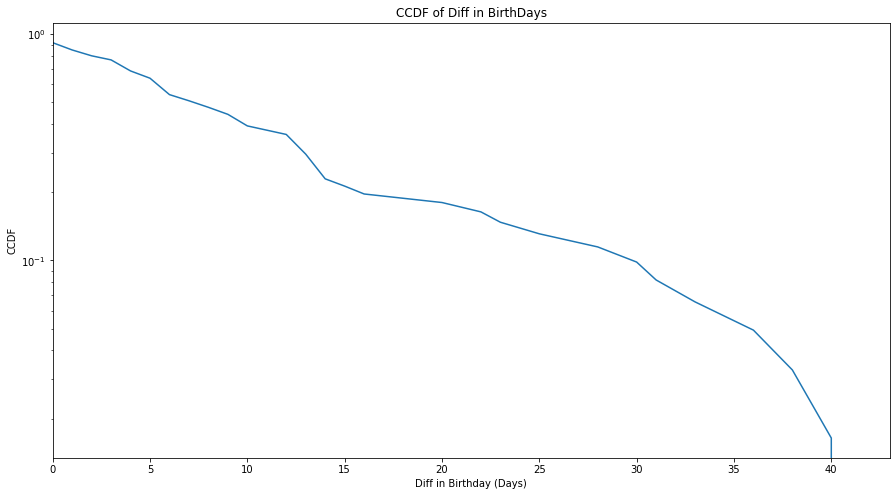

In [15]:
CCDF_birhday.plot(legend = False,logy = True,figsize = (15,8))
plt.title('CCDF of Diff in BirthDays')
plt.xlabel('Diff in Birthday (Days)')
plt.ylabel('CCDF')


Text(0, 0.5, 'CDF')

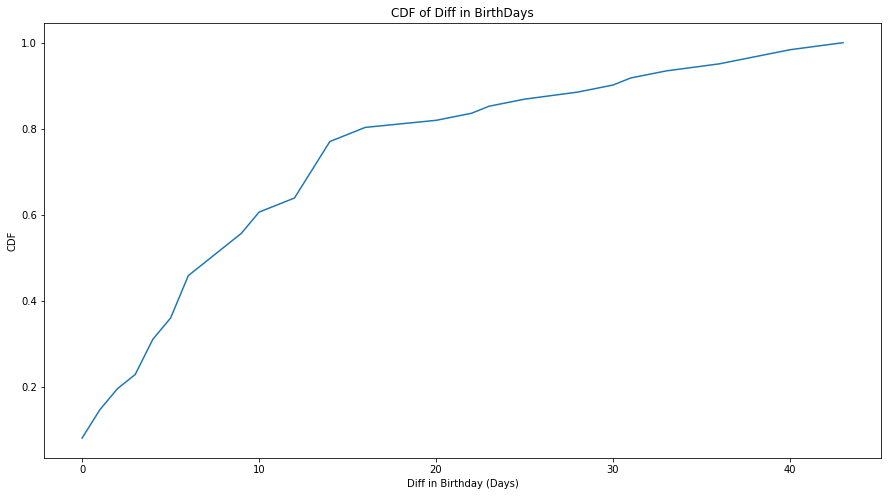

In [16]:
plt.figure(figsize =(15,8))
birthdates_cdf.plot()
plt.title('CDF of Diff in BirthDays')
plt.xlabel('Diff in Birthday (Days)')
plt.ylabel('CDF')


In [17]:
birthdates['diff'].describe()

count    61.000000
mean     11.426230
std      11.044545
min       0.000000
25%       4.000000
50%       8.000000
75%      14.000000
max      43.000000
Name: diff, dtype: float64

# Normal Distribution

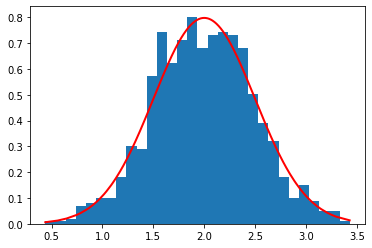

In [18]:
mu=2
sigma = 0.5
sample = np.random.normal(mu,sigma,1000)
count, bins, ignored = plt.hist(sample, 30, density=True)
sample.sort()
plt.plot(sample, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (sample - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()



In [19]:
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
weights = pregnancies[pregnancies['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']

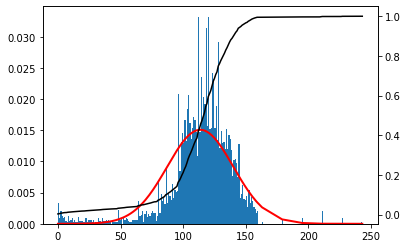

In [20]:
weights = np.array(weights)
mu = weights.mean()
sigma  = weights.std()
bins =  int(weights.max() - weights.min())
weights_cdf = Cdf.from_seq(weights)
fig,ax = plt.subplots()
ax.hist(weights, bins, density=True)
weights.sort()
ax2 = ax.twinx()
ax.plot(weights, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (weights - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

weights_cdf.plot(color='k')
plt.show()

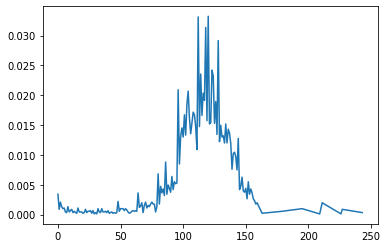

In [21]:
weights_pdf = Pmf.from_seq(weights)
weights_pdf.plot()

# Exercise 4.7

Fraction of Population having IQ greater than mean = 0.487
Fraction of Population having IQ greater than 115 = 0.16500000000000004
Fraction of Population having IQ greater than 130 = 0.02100000000000002
Fraction of Population having IQ greater than 145 = 0.0010000000000000009
Fraction of Population having IQ greater than 190 = 0.0


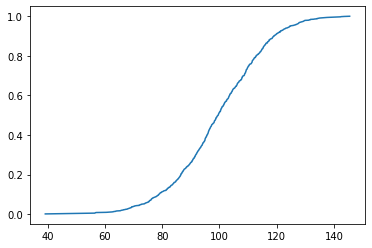

In [22]:
mu = 100
sigma = 15
sample = np.random.normal(mu,sigma,1000)
sample_cdf= Cdf.from_seq(sample)
sample_cdf.plot()
print(f'Fraction of Population having IQ greater than mean = {1- sample_cdf(mu)}')
print(f'Fraction of Population having IQ greater than 115 = {1- sample_cdf(115)}')
print(f'Fraction of Population having IQ greater than 130 = {1- sample_cdf(130)}')
print(f'Fraction of Population having IQ greater than 145 = {1- sample_cdf(145)}')
print(f'Fraction of Population having IQ greater than 190 = {1- sample_cdf(190)}')


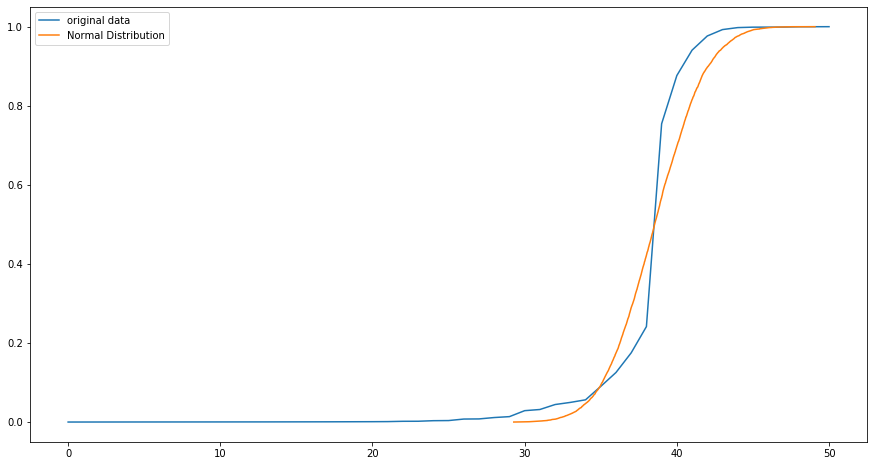

In [23]:
lengths = pregnancies[pregnancies['outcome'] == 1]['prglength'].dropna()
mu = lengths.mean()
sigma = lengths.std()
length_cdf = Cdf.from_seq(lengths)
sample = np.random.normal(mu,sigma,len(lengths))
sample_cdf = Cdf.from_seq(sample)
fig,ax = plt.subplots(figsize = (15,8))
length_cdf.plot(label = 'original data')
sample_cdf.plot(label = 'Normal Distribution')
plt.legend()
plt.show()


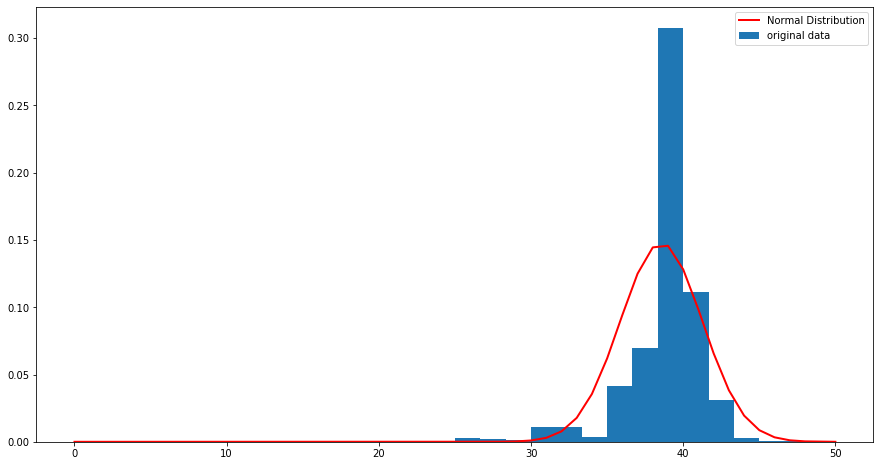

In [24]:
plt.figure(figsize = (15,8))
plt.hist(lengths, 30, density=True,label = 'original data')
lengths = np.array(lengths)
lengths.sort()
plt.plot(lengths, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (lengths - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r',label = 'Normal Distribution')
plt.legend()
plt.show()

# Exercise 4.10

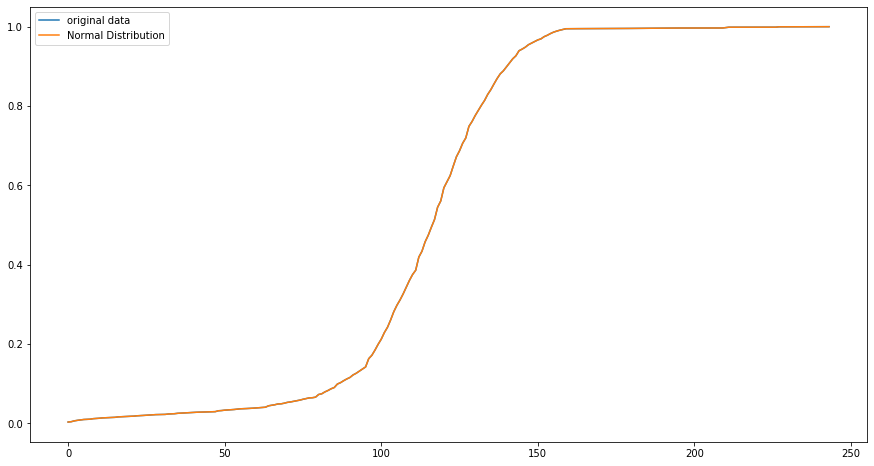

In [25]:
mu = weights.mean()
sigma = weights.std()
length_cdf = Cdf.from_seq(weights)
sample = np.random.normal(mu,sigma,len(weights))
sample_cdf = Cdf.from_seq(weights)
fig,ax = plt.subplots(figsize = (15,8))
length_cdf.plot(label = 'original data')
sample_cdf.plot(label = 'Normal Distribution')
plt.legend()
plt.show()


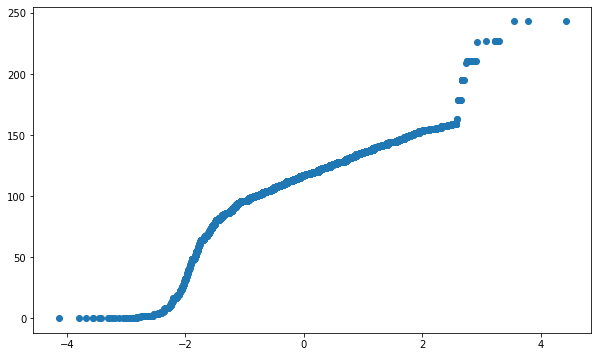

In [26]:
sample = (sample - sample.mean())/sample.std()
#s = sorted(sample)
#w= sorted(weights)
s = []
w= []

for i in np.linspace(0,1,len(sample)):
    s.append(np.quantile(sample,i))
    w.append(np.quantile(weights,i))

fig = plt.figure(figsize=(10, 6))    
plt.scatter(s,w)

((array([-3.78687766, -3.56039713, -3.43599578, ...,  3.43599578,
          3.56039713,  3.78687766]),
  array([  0.,   0.,   0., ..., 243., 243., 243.])),
 (24.91259375535082, 113.62859029382635, 0.9416844135686685))

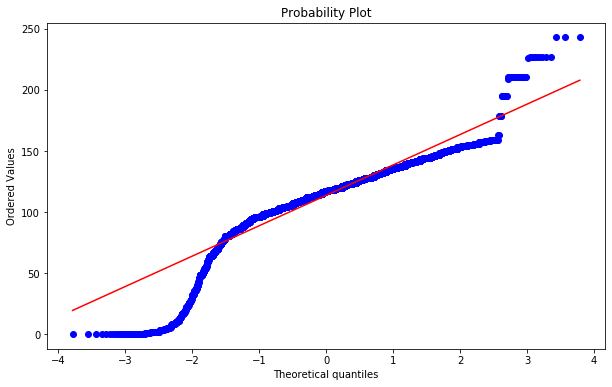

In [27]:
import scipy.stats as stats
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
stats.probplot(weights, plot=ax)


# Exercise 4.9

In [33]:
def sample():
    return sorted(np.random.normal(0,1,6))

def samples():
    l = []
    for i in range(1, 10001):
        l.append(sample())
    return l

l = samples()
m = np.array(l).mean(axis = 0)
m

array([-1.27224797, -0.63996132, -0.19654675,  0.20174523,  0.64742471,
        1.26912656])

In [88]:
brfs_data = pd.read_fwf("CDBRFS08.ASC", 
                       names=["age", "weight2", "wtyrago", "sex", "htm3", "wtkg2"],
                       colspecs=[(100, 102), (119, 122), (127, 130), (142, 143), (1251, 1253),
                                 (1254, 1258)])
brfs_data.head()

,age,weight2,wtyrago,sex,htm3,wtkg2
0,82,156.0,168.0,2,57,7091
1,65,160.0,160.0,2,63,7273
2,48,777.0,NaN,2,65,9999
3,61,162.0,162.0,1,70,7364
4,26,195.0,195.0,1,85,8864


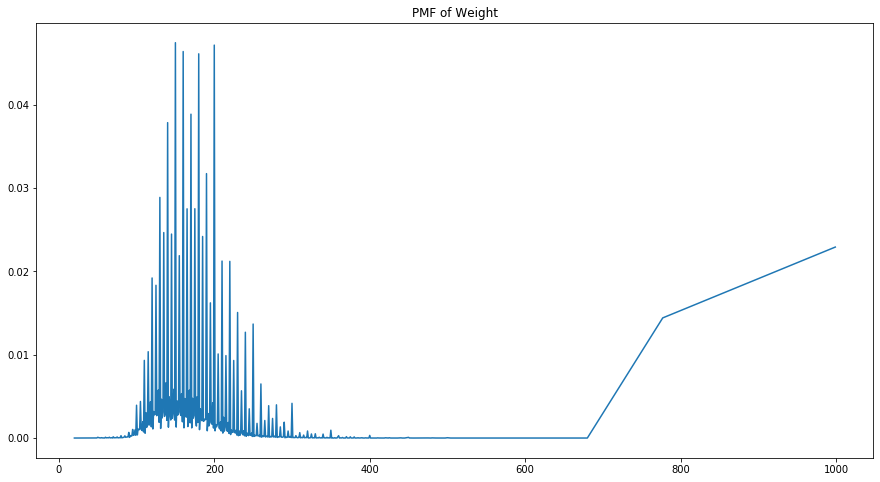

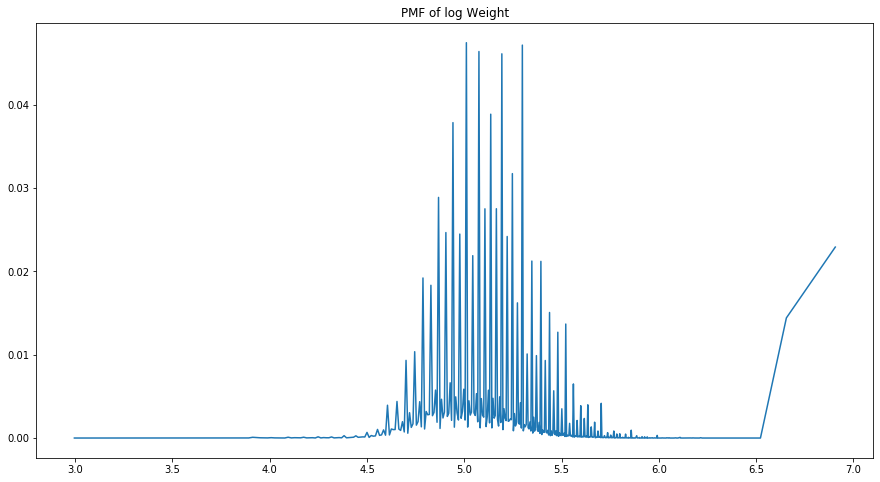

In [89]:
fig,ax = plt.subplots(figsize = (15,8))
w = brfs_data["weight2"].dropna()
pdf = Pmf.from_seq(w)
pdf_log = Pmf.from_seq(np.log(w))
pdf.plot()
plt.title('PMF of Weight')
plt.show()
fig,ax = plt.subplots(figsize = (15,8))
plt.title('PMF of log Weight')
pdf_log.plot()


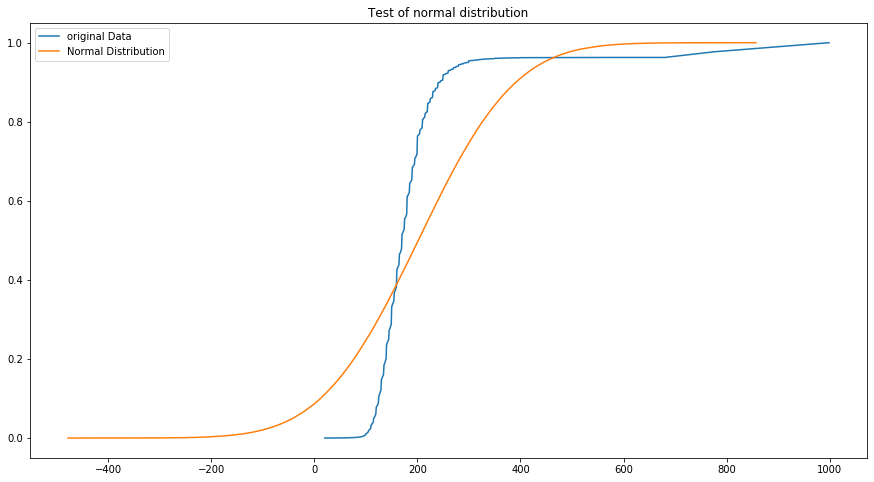

In [90]:
fig,ax = plt.subplots(figsize = (15,8))
mu = w.mean()
sigma = w.std()
w_sample = np.random.normal(mu,sigma,len(w))
w_cdf = Cdf.from_seq(w)
w_sample_cdf = Cdf.from_seq(w_sample)
w_cdf.plot(label = 'original Data')
w_sample_cdf.plot(label = 'Normal Distribution')
plt.legend()
plt.title('Test of normal distribution')
plt.show()

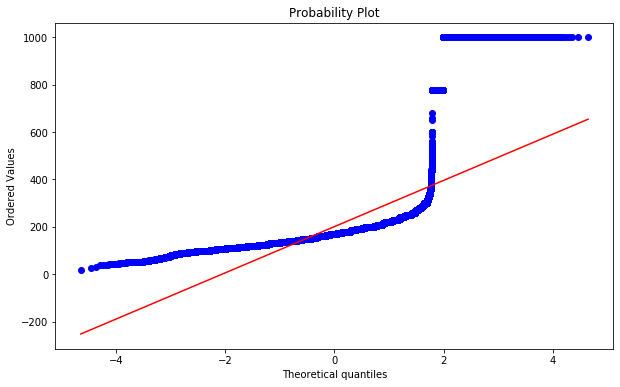

In [91]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
stats.probplot(w, plot=ax)
plt.show()

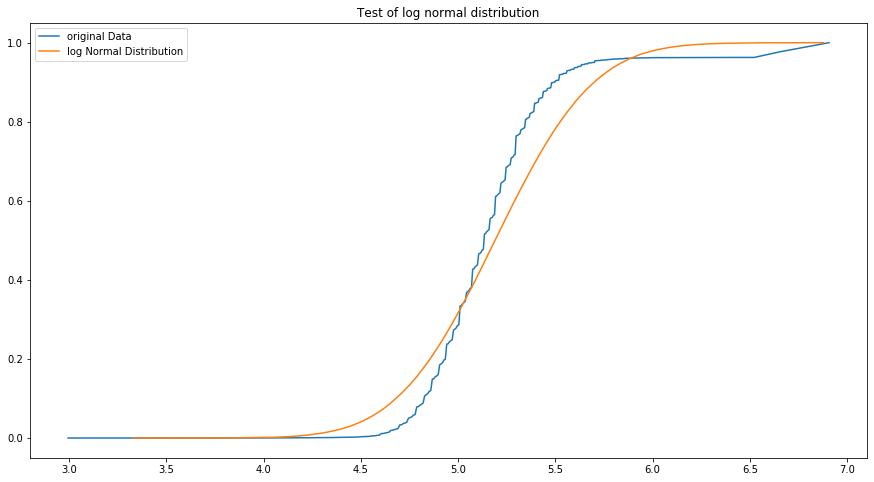

In [92]:
w = np.log(w)
fig,ax = plt.subplots(figsize = (15,8))
mu = w.mean()
sigma = w.std()
w_sample = np.random.normal(mu,sigma,len(w))
w_cdf = Cdf.from_seq(w)
w_sample_cdf = Cdf.from_seq(w_sample)
w_cdf.plot(label = 'original Data')
w_sample_cdf.plot(label = 'log Normal Distribution')
plt.legend()
plt.title('Test of log normal distribution')
plt.show()

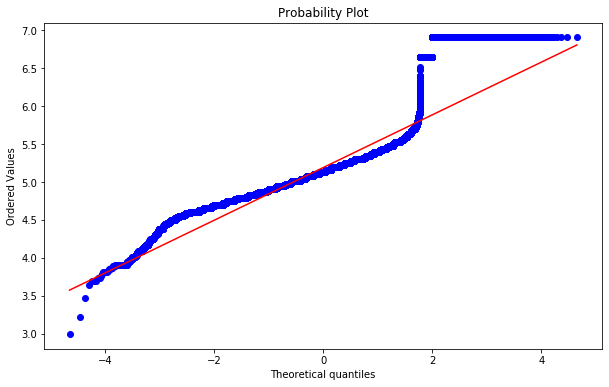

In [93]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
stats.probplot(w, plot=ax)
plt.show()